In [3]:
from pathlib import Path
from pyhdf.SD import SD, SDC
import pprint
import numpy as np
from matplotlib import pyplot as plt


In [4]:
home = Path.home()
print(home)
data_dir = home / Path("OneDrive/Documents/thesis/")
print(data_dir)



C:\Users\jesse
C:\Users\jesse\OneDrive\Documents\thesis


In [5]:
#hdf_files="MYD021KM.A2013122.1140.061.2018046032403.hdf"
hdf_files=list(data_dir.glob("MYD021KM*.hdf"))
hdf_files

[WindowsPath('C:/Users/jesse/OneDrive/Documents/thesis/MYD021KM.A2013122.1140.061.2018046032403.hdf')]

In [6]:
file_name = str(data_dir / Path(hdf_files[0]))
print(f'reading {file_name}')
the_file = SD(file_name, SDC.READ)

datasets_dict = the_file.datasets()

for idx,sds in enumerate(datasets_dict.keys()):
    print(idx,sds)

reading C:\Users\jesse\OneDrive\Documents\thesis\MYD021KM.A2013122.1140.061.2018046032403.hdf
0 Latitude
1 Longitude
2 EV_1KM_RefSB
3 EV_1KM_RefSB_Uncert_Indexes
4 EV_1KM_Emissive
5 EV_1KM_Emissive_Uncert_Indexes
6 EV_250_Aggr1km_RefSB
7 EV_250_Aggr1km_RefSB_Uncert_Indexes
8 EV_250_Aggr1km_RefSB_Samples_Used
9 EV_500_Aggr1km_RefSB
10 EV_500_Aggr1km_RefSB_Uncert_Indexes
11 EV_500_Aggr1km_RefSB_Samples_Used
12 Height
13 SensorZenith
14 SensorAzimuth
15 Range
16 SolarZenith
17 SolarAzimuth
18 gflags
19 EV_Band26
20 EV_Band26_Uncert_Indexes
21 Band_250M
22 Band_500M
23 Band_1KM_RefSB
24 Band_1KM_Emissive
25 Noise in Thermal Detectors
26 Change in relative responses of thermal detectors
27 DC Restore Change for Thermal Bands
28 DC Restore Change for Reflective 250m Bands
29 DC Restore Change for Reflective 500m Bands
30 DC Restore Change for Reflective 1km Bands


# Radiance

In [20]:
# EV_250_Aggr1km_RefSB
longwave_data = the_file.select('EV_250_Aggr1km_RefSB') # select sds
print(longwave_data.info())
help(longwave_data.info)
# first row of the first channel and find its numpy dtype
data_row = longwave_data[0,0,:] # get sds data
print(data_row.shape,data_row.dtype)

('EV_250_Aggr1km_RefSB', 3, [2, 2030, 1354], 23, 14)
Help on method info in module pyhdf.SD:

info() method of pyhdf.SD.SDS instance
    Retrieves information about the dataset.
    
    Args::
    
      no argument
    
    Returns::
    
      5-element tuple holding:
    
      - dataset name
      - dataset rank (number of dimensions)
      - dataset shape, that is a list giving the length of each
        dataset dimension; if the first dimension is unlimited, then
        the first value of the list gives the current length of the
        unlimited dimension
      - data type (one of the SDC.xxx values)
      - number of attributes defined for the dataset
    
    C library equivalent : SDgetinfo

(1354,) uint16


In [21]:
# all the rows and columns for the first channel
longwave_data[0,:,:]


array([[1151, 1149, 1158, ..., 1408, 1404, 1410],
       [1147, 1144, 1153, ..., 1402, 1398, 1397],
       [1148, 1143, 1146, ..., 1390, 1398, 1397],
       ...,
       [1267, 1375, 1348, ..., 5677, 6017, 6282],
       [1262, 1275, 1269, ..., 6155, 5924, 6591],
       [1275, 1357, 1280, ..., 6305, 6326, 7100]], dtype=uint16)

In [22]:
# attributes for EV_1KM_Emissive
pprint.pprint(longwave_data.attributes() )


{'_FillValue': 65535,
 'band_names': '1,2',
 'corrected_counts_offsets': [-0.0, -0.0],
 'corrected_counts_scales': [0.12497329711914062, 0.12497329711914062],
 'corrected_counts_units': 'counts',
 'long_name': 'Earth View 250M Aggregated 1km Reflective Solar Bands Scaled '
              'Integers',
 'radiance_offsets': [-0.0, -0.0],
 'radiance_scales': [0.025139465928077698, 0.008537258952856064],
 'radiance_units': 'Watts/m^2/micrometer/steradian',
 'reflectance_offsets': [-0.0, -0.0],
 'reflectance_scales': [4.989365334040485e-05, 2.748476435954217e-05],
 'reflectance_units': 'none',
 'units': 'none',
 'valid_range': [0, 32767]}


In [24]:
# first row of the first channel and find its numpy dtype
data_row = longwave_data[0,0,:] # get sds data
print(data_row.shape,data_row.dtype)
longwave_bands = the_file.select('Band_250M')
longwave_bands.attributes()

band_nums=longwave_bands.get()
print(f'here are the modis channels in the emissive dataset \n{band_nums}')

(1354,) uint16
here are the modis channels in the emissive dataset 
[1. 2.]


In [31]:
scales=longwave_data.attributes()['radiance_scales']
offsets=longwave_data.attributes()['radiance_offsets']
ch30_scale=scales[0]
ch30_offset=offsets[0]
ch30_data = longwave_data[0,:,:]

print(f'scale: {ch30_scale}, offset: {ch30_offset}')

scale: 0.025139465928077698, offset: -0.0


(2030, 1354)
uint16
(2030, 1354)


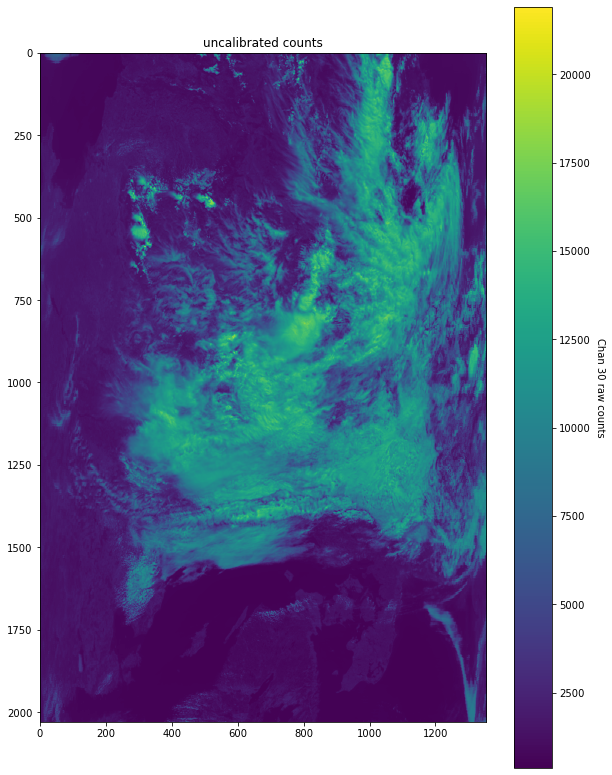

In [29]:
#Read channel 30 at index 9 into a numpy array of type uint16
print(ch30_data.shape)
print(ch30_data.dtype)
#Plot the channel 30 image
fig,ax = plt.subplots(1,1,figsize = (10,14))
CS=ax.imshow(ch30_data)
cax=fig.colorbar(CS)
ax.set_title('uncalibrated counts')
#
# add a label to the colorbar and flip it around 270 degrees
#
out=cax.ax.set_ylabel('Chan 30 raw counts')
out.set_verticalalignment('bottom')
out.set_rotation(270)
print(ch30_data.shape)

(2030, 1354)

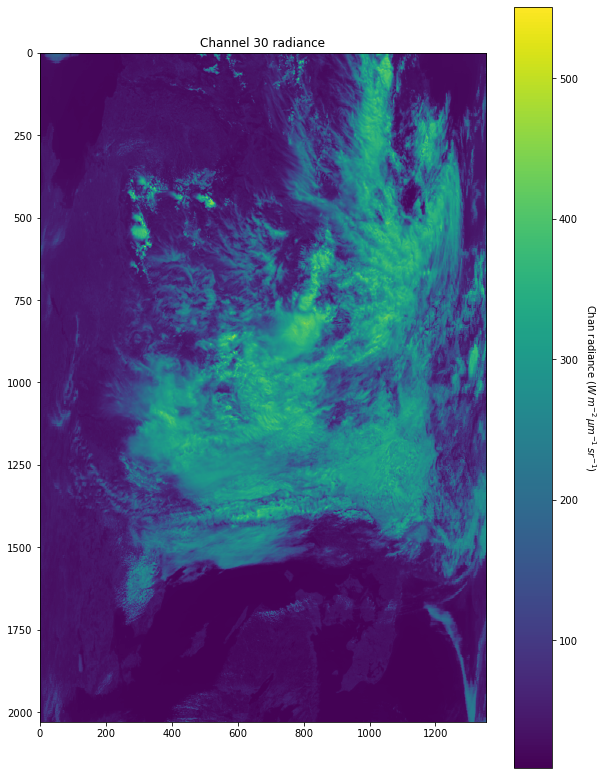

In [32]:
ch30_calibrated =(ch30_data - ch30_offset)*ch30_scale
fig,ax = plt.subplots(1,1,figsize = (10,14))
CS=ax.imshow(ch30_calibrated)
cax=fig.colorbar(CS)
ax.set_title('Channel 30 radiance')
#
# add a label to the colorbar and flip it around 270 degrees
#
out=cax.ax.set_ylabel('Chan radiance $(W\,m^{-2}\,\mu m^{-1}\,sr^{-1})$')
out.set_verticalalignment('bottom')
out.set_rotation(270)
ch30_calibrated.shape

In [34]:
np.mean(ch30_calibrated)

118.66492935593057

# emissive

In [7]:
longwave_data = the_file.select('EV_1KM_Emissive') # select sds
print(longwave_data.info())
help(longwave_data.info)

('EV_1KM_Emissive', 3, [16, 2030, 1354], 23, 8)
Help on method info in module pyhdf.SD:

info() method of pyhdf.SD.SDS instance
    Retrieves information about the dataset.
    
    Args::
    
      no argument
    
    Returns::
    
      5-element tuple holding:
    
      - dataset name
      - dataset rank (number of dimensions)
      - dataset shape, that is a list giving the length of each
        dataset dimension; if the first dimension is unlimited, then
        the first value of the list gives the current length of the
        unlimited dimension
      - data type (one of the SDC.xxx values)
      - number of attributes defined for the dataset
    
    C library equivalent : SDgetinfo



In [8]:
# first row of the first channel and find its numpy dtype
data_row = longwave_data[0,0,:] # get sds data
print(data_row.shape,data_row.dtype)

(1354,) uint16


In [9]:
# all the rows and columns for the first channel
longwave_data[0,:,:]


array([[ 6373,  6388,  6388, ...,  6740,  6717,  6694],
       [ 6360,  6383,  6390, ...,  6749,  6734,  6718],
       [ 6327,  6372,  6395, ...,  6738,  6723,  6708],
       ...,
       [ 6549,  6736,  6781, ..., 10026, 10463, 10237],
       [ 6701,  6558,  6641, ...,  9755, 10292,  9861],
       [ 6534,  6690,  6713, ...,  9825, 10131,  9661]], dtype=uint16)

In [10]:
# attributes for EV_1KM_Emissive
pprint.pprint(longwave_data.attributes() )


{'_FillValue': 65535,
 'band_names': '20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36',
 'long_name': 'Earth View 1KM Emissive Bands Scaled Integers',
 'radiance_offsets': [2467.264404296875,
                      2480.6005859375,
                      2478.176513671875,
                      2402.468505859375,
                      1077.44482421875,
                      1560.3333740234375,
                      2724.21826171875,
                      2317.48828125,
                      2610.015380859375,
                      1560.333251953125,
                      2035.9332275390625,
                      2119.08447265625,
                      2500.599365234375,
                      2499.093505859375,
                      2500.5205078125,
                      2495.89111328125],
 'radiance_scales': [6.9307534431573e-05,
                     0.00346690253354609,
                     7.626575097674504e-05,
                     8.990753121906891e-05,
                     3.1556141

In [30]:
longwave_bands = the_file.select('Band_1KM_Emissive')
longwave_bands.attributes()


{'long_name': '1KM Emissive Band Numbers for Subsetting'}

In [31]:
band_nums=longwave_bands.get()
print(f'here are the modis channels in the emissive dataset \n{band_nums}')

here are the modis channels in the emissive dataset 
[20. 21. 22. 23. 24. 25. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.]


In [32]:
ch30_index=np.searchsorted(band_nums,30.)
print(ch30_index.dtype)
ch30_index = int(ch30_index) #(float doesn't work)
print(f'channel 30 is located at index {ch30_index}')

int64
channel 30 is located at index 9


In [34]:
#Read channel 30 at index 9 into a numpy array of type uint16
ch30_data = longwave_data[ch30_index,:,:]
print(ch30_data.shape)
print(ch30_data.dtype)

(2030, 1354)
uint16


(2030, 1354)


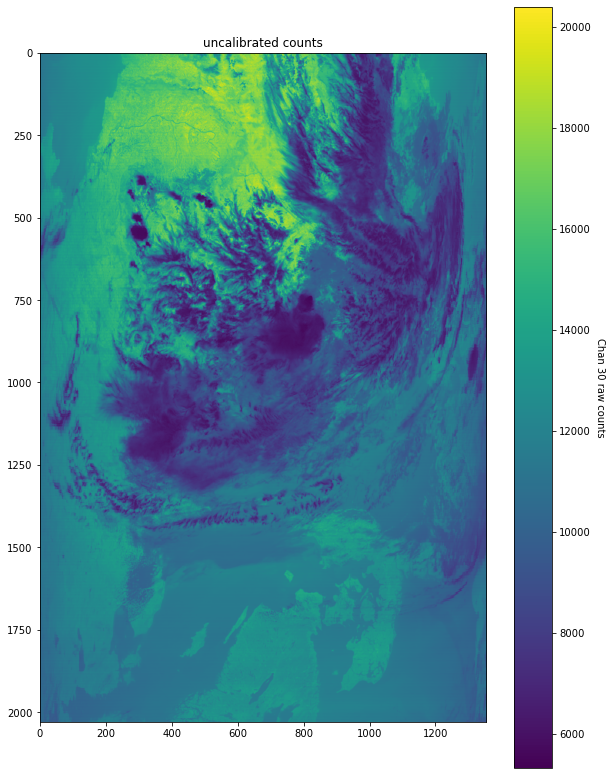

In [35]:
#Plot the channel 30 image
fig,ax = plt.subplots(1,1,figsize = (10,14))
CS=ax.imshow(ch30_data)
cax=fig.colorbar(CS)
ax.set_title('uncalibrated counts')
#
# add a label to the colorbar and flip it around 270 degrees
#
out=cax.ax.set_ylabel('Chan 30 raw counts')
out.set_verticalalignment('bottom')
out.set_rotation(270)
print(ch30_data.shape)

In [36]:
scales=longwave_data.attributes()['radiance_scales']
offsets=longwave_data.attributes()['radiance_offsets']
ch30_scale=scales[ch30_index]
ch30_offset=offsets[ch30_index]
print(f'scale: {ch30_scale}, offset: {ch30_offset}')

scale: 0.0004063234373461455, offset: 1560.333251953125


In [37]:
ch30_calibrated =(ch30_data - ch30_offset)*ch30_scale

(2030, 1354)

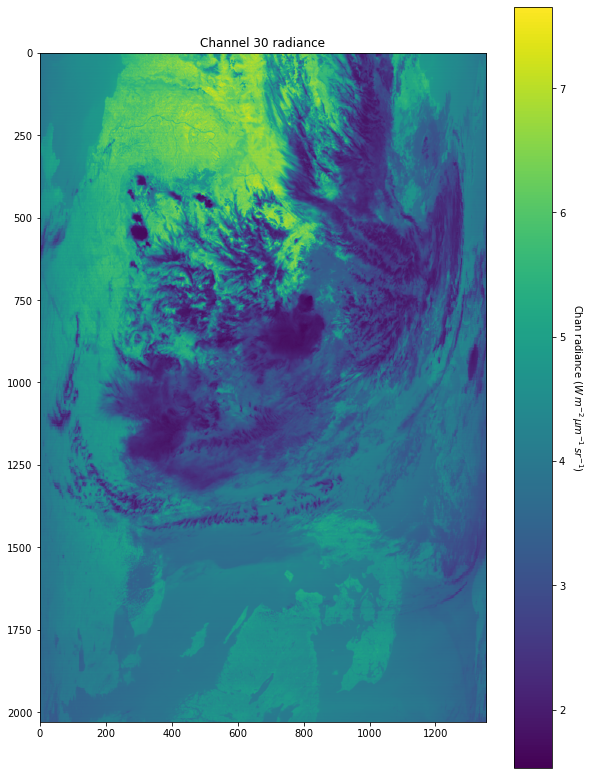

In [38]:
fig,ax = plt.subplots(1,1,figsize = (10,14))
CS=ax.imshow(ch30_calibrated)
cax=fig.colorbar(CS)
ax.set_title('Channel 30 radiance')
#
# add a label to the colorbar and flip it around 270 degrees
#
out=cax.ax.set_ylabel('Chan radiance $(W\,m^{-2}\,\mu m^{-1}\,sr^{-1})$')
out.set_verticalalignment('bottom')
out.set_rotation(270)
ch30_calibrated.shape

In [39]:
# Create an HDF file 30 channel
outname="ch30_out.hdf"
sd = SD(outname, SDC.WRITE | SDC.CREATE)

# Create a dataset
sds = sd.create("ch30", SDC.FLOAT64, ch30_calibrated.shape)

# Fill the dataset with a fill value
sds.setfillvalue(0)

# Set dimension names
dim1 = sds.dim(0)
dim1.setname("row")
dim2 = sds.dim(1)
dim2.setname("col")

# Assign an attribute to the dataset
sds.units = "W/m^2/micron/sr"

# Write data
sds[:,:] = ch30_calibrated

# Close the dataset
sds.endaccess()

# Flush and close the HDF file
sd.end()

In [42]:
%cd /Users/jesse/OneDrive/Documents/thesis


C:\Users\jesse\OneDrive\Documents\thesis


In [43]:
%ls

 Volume in drive C is OS
 Volume Serial Number is C217-23DD

 Directory of C:\Users\jesse\OneDrive\Documents\thesis

25/06/2021  00:03    <DIR>          .
25/06/2021  00:03    <DIR>          ..
18/06/2021  00:26       152.635.841 MYD021KM.A2013122.1140.061.2018046032403.hdf
21/06/2021  23:30               239 MYD021KM.A2013122.1140.061.2018046032403.nc.pid10164.ncks.tmp
21/06/2021  23:30               239 MYD021KM.A2013122.1140.061.2018046032403.nc.pid20988.ncks.tmp
24/06/2021  22:48       274.646.680 output-data_rttov_T12.nc
               4 File(s)    427.282.999 bytes
               2 Dir(s)  817.623.945.216 bytes free


In [44]:
!ncdump -h 'MYD021KM.A2013122.1140.061.2018046032403.hdf'

ncdump: 'MYD021KM.A2013122.1140.061.2018046032403.hdf': No such file or directory


In [ ]:
# SIMULATIONS

In [63]:
#hdf_files="MYD021KM.A2013122.1140.061.2018046032403.hdf"
ds=list(data_dir.glob("output-data_rttov_T12.nc"))
ds
ds_output = str(data_dir / Path(ds[0]))
print(f'reading {ds_output}')
ds_output = SD(ds_output, SDC.READ)

datasets_dict = ds_output.datasets()

for idx,sds in enumerate(datasets_dict.keys()):
    print(idx,sds)

reading C:\Users\jesse\OneDrive\Documents\thesis\output-data_rttov_T12.nc
0 lat
1 lon
2 Y
3 Y_clear
4 brdf
5 iwp_ret
6 iwp_model
7 g
8 f
9 f_clear


In [65]:
# EV_250_Aggr1km_RefSB
TOA_radiance = the_file.select('Y') # select sds
print(TOA_radiance.info())
help(TOA_radiance.info)
# first row of the first channel and find its numpy dtype
data_row = TOA_radiance[0,0,:] # get sds data
print(data_row.shape,data_row.dtype)

('Y', 3, [36, 637, 589], 5, 0)
Help on method info in module pyhdf.SD:

info() method of pyhdf.SD.SDS instance
    Retrieves information about the dataset.
    
    Args::
    
      no argument
    
    Returns::
    
      5-element tuple holding:
    
      - dataset name
      - dataset rank (number of dimensions)
      - dataset shape, that is a list giving the length of each
        dataset dimension; if the first dimension is unlimited, then
        the first value of the list gives the current length of the
        unlimited dimension
      - data type (one of the SDC.xxx values)
      - number of attributes defined for the dataset
    
    C library equivalent : SDgetinfo

(589,) float32


In [66]:
# all the rows and columns for the first channel
TOA_radiance[0,:,:]


array([[          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       ...,
       [5.6389952e-01, 5.6512237e-01, 5.6674296e-01, ..., 1.3421370e+05,
        4.3649094e+19, 4.6535969e-01],
       [5.5687946e-01, 5.7561493e-01, 5.9307456e-01, ..., 4.8475253e+05,
        9.7907104e+07, 4.3100703e-01],
       [5.4995054e-01, 5.4598498e-01, 5.5565590e-01, ..., 1.1013413e+01,
        3.7843453e+15, 4.0504289e-01]], dtype=float32)

(637, 589)
float32
(637, 589)


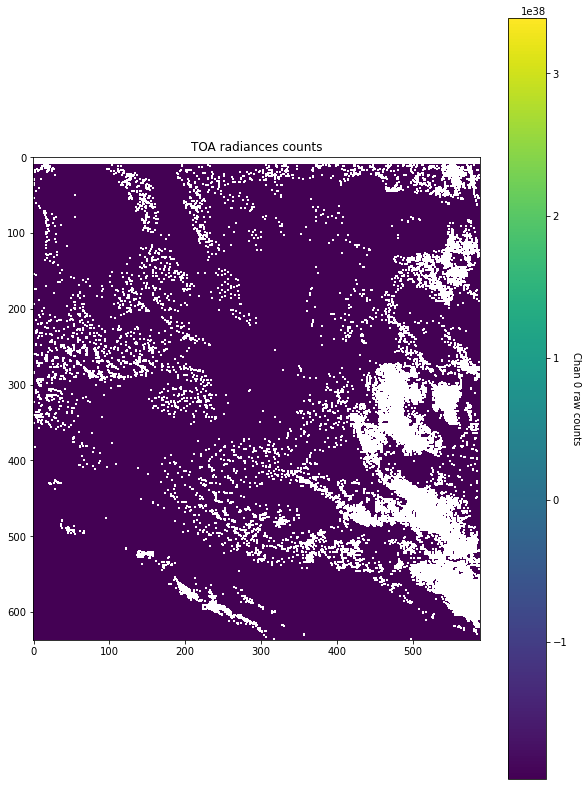

In [75]:
# first row of the first channel and find its numpy dtype
ch_index=1

#Read channel 1 at index 0 into a numpy array of type uint16
ch0_data = TOA_radiance[ch_index,:,:]
print(ch0_data.shape)
print(ch0_data.dtype)
#Plot the channel 30 image
fig,ax = plt.subplots(1,1,figsize = (10,14))
CS=ax.imshow(ch0_data)
cax=fig.colorbar(CS)
ax.set_title('TOA radiances counts')
#
# add a label to the colorbar and flip it around 270 degrees
#
out=cax.ax.set_ylabel('Chan 0 raw counts')
out.set_verticalalignment('bottom')
out.set_rotation(270)
print(ch0_data.shape)

In [45]:
######check the next code with other env

'C:\\Users\\jesse\\OneDrive\\Documents\\thesis'

In [56]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [57]:
fname = "output-data_rttov_T12.nc"
ds = xr.open_dataset(fname)

ValueError: cannot guess the engine, try passing one explicitly

In [58]:
ds.values

NameError: name 'ds' is not defined

In [59]:
TOA_radiance =ds['Y']#[0,:,0,0]
print('-----------------------')
print(TOA_radiance)

NameError: name 'ds' is not defined

In [60]:
#-- print dataset minimum/maximum: prints the name of the variables,
#-- their types and minimum value
print('------------------------------------------------------')
print()
print('--> print dataset min')
print()
print(ds.min().values)
print()
print('--> print dataset max')
print()
print(ds.max().values)
print()

------------------------------------------------------

--> print dataset min



NameError: name 'ds' is not defined